<a href="https://colab.research.google.com/github/iamkarandeepsingh/Weather-Forecast-Analysis/blob/main/Weather_Forecast_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
# Step 1: Install Python 3.11 and create symlinks
!sudo apt-get update -y
!sudo apt-get install -y python3.11 python3.11-distutils python3.11-venv

# Step 2: Point "python" and "python3" to Python 3.11
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.12 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.11 2
!sudo update-alternatives --set python3 /usr/bin/python3.11

# Step 3: Reinstall pip for Python 3.11
!curl -sS https://bootstrap.pypa.io/get-pip.py | sudo python3.11

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.2.2
Seaborn version:  0.13.2


**Dataset**

This dataset, sourced from Kaggle, contains approximately ten years of daily meteorological observations collected from numerous weather stations across Australia. It provides a comprehensive set of atmospheric and environmental measurements that can support climate analysis, statistical evaluation, and predictive modeling.

While the original Kaggle dataset includes the target variable RainTomorrow, the file provided here represents a slightly reduced version focused solely on weather conditions recorded for the current day.

The dataset consists of the following features:

**row ID:** Unique identifier corresponding to each recorded observation.

**Location:** Name of the weather station at which the measurement was taken.

**MinTemp:** Minimum temperature (°C) observed during the day.

**MaxTemp:** Maximum temperature (°C) observed during the day.

**Rainfall:** Total precipitation (mm) recorded for the day.

**Evaporation:** Class A pan evaporation (mm) measured over the 24 hours preceding 9 a.m.

**Sunshine:** Duration of bright sunshine recorded during the day (hours).

**WindGustDir:** Compass direction of the strongest wind gust within the previous 24 hours.

**WindGustSpeed:** Maximum wind gust speed (km/h).

**WindDir9am:** Wind direction recorded at 9 a.m.

**WindDir3pm:** Wind direction recorded at 3 p.m.

**Humidity9am:** Relative humidity (%) measured at 9 a.m.

**Humidity3pm:** Relative humidity (%) measured at 3 p.m.

**Pressure9am:** Atmospheric pressure (hPa) at 9 a.m., reduced to mean sea level.

**Pressure3pm:** Atmospheric pressure (hPa) at 3 p.m., reduced to mean sea level.

**Cloud9am:** Fraction of sky obscured by cloud at 9 a.m., expressed in oktas.

**Cloud3pm:** Fraction of sky obscured by cloud at 3 p.m., expressed in oktas.

**Temp9am:** Temperature (°C) recorded at 9 a.m.

**Temp3pm:** Temperature (°C) recorded at 3 p.m.

**RainToday:** Binary indication of whether rainfall exceeded 1 mm in the prior 24-hour period (“Yes”/“No”).

**Read the dataset**

**pd.read_csv** is a function in the pandas library in Python that is used to read a CSV (Comma Separated Values) file and convert it into a pandas DataFrame.

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/iamkarandeepsingh/Weather-Forecast-Analysis/refs/heads/main/Weather%20Test%20Data.csv')
df.head(25)

row ID Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    Row0   Albury     12.9     25.7       0.0          NaN       NaN   
1    Row1   Albury      9.2     28.0       0.0          NaN       NaN   
2    Row2   Albury     14.3     25.0       0.0          NaN       NaN   
3    Row3   Albury      9.7     31.9       0.0          NaN       NaN   
4    Row4   Albury     15.9     18.6      15.6          NaN       NaN   
5    Row6   Albury     11.5     29.3       0.0          NaN       NaN   
6    Row7   Albury     16.2     33.9       0.0          NaN       NaN   
7    Row8   Albury     12.0     24.4       0.8          NaN       NaN   
8    Row9   Albury     11.3     26.5       0.0          NaN       NaN   
9   Row10   Albury     12.9     35.8       0.0          NaN       NaN   
10  Row11   Albury     13.7     37.9       0.0          NaN       NaN   
11  Row12   Albury     16.9     32.0       0.0          NaN       NaN   
12  Row13   Albury     17.4     43.0       0.0          NaN       NaN   
13  Row14   Albury     10.5     28.4       0.0          NaN       NaN   
14  Row15   Albury     13.9     36.6       0.0          NaN       NaN   
15  Row16   Albury     19.3     38.1       0.8          NaN       NaN   
16  Row17   Albury     24.4     34.0       0.6          NaN       NaN   
17  Row18   Albury     18.5     38.2       0.0          NaN       NaN   
18  Row19   Albury     20.4     40.7       0.0          NaN       NaN   
19  Row20   Albury     22.3     42.9       0.0          NaN       NaN   
20  Row21   Albury     21.5     37.7       0.0          NaN       NaN   
21  Row22   Albury     21.5     41.2       0.0          NaN       NaN   
22  Row23   Albury     18.4     31.2       0.4          NaN       NaN   
23  Row24   Albury     16.1     21.6       0.0          NaN       NaN   
24  Row25   Albury     13.3     31.3       0.0          NaN       NaN   

   WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  \
0          WSW           46.0          W  ...         26.0         38.0   
1           NE           24.0         SE  ...          9.0         45.0   
2            W           50.0         SW  ...         24.0         49.0   
3          NNW           80.0         SE  ...         28.0         42.0   
4            W           61.0        NNW  ...         28.0         76.0   
5            S           24.0         SE  ...          9.0         56.0   
6          WSW           35.0         SE  ...         13.0         45.0   
7            W           39.0        WNW  ...         17.0         48.0   
8          WNW           56.0          W  ...         31.0         46.0   
9          WNW           41.0        ENE  ...         26.0         41.0   
10           W           52.0         SE  ...         26.0         33.0   
11           S           31.0        SSE  ...         17.0         52.0   
12          NW           39.0        SSE  ...         17.0         40.0   
13          SE           33.0         SE  ...         11.0         35.0   
14         WNW           39.0        SSE  ...         15.0         39.0   
15         NNW           61.0         NE  ...         17.0         48.0   
16          NW           98.0          N  ...         48.0         60.0   
17         NNE           31.0         SE  ...         17.0         48.0   
18           N           37.0          E  ...         13.0         45.0   
19         NNE           28.0        ESE  ...         11.0         37.0   
20         NaN            NaN          N  ...          9.0         51.0   
21         WSW           35.0        SSE  ...         19.0         48.0   
22          SE           37.0         SW  ...         11.0         66.0   
23          SE           46.0        SSE  ...         15.0         58.0   
24         NNE           41.0        SSE  ...         15.0         50.0   

    Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0          30.0       1007.6       1008.7       NaN       2.0     21.0   
1    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42677 entries, 0 to 42676
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         42677 non-null  object 
 1   Location       42677 non-null  object 
 2   MinTemp        42483 non-null  float64
 3   MaxTemp        42585 non-null  float64
 4   Rainfall       42250 non-null  float64
 5   Evaporation    24365 non-null  float64
 6   Sunshine       22178 non-null  float64
 7   WindGustDir    39868 non-null  object 
 8   WindGustSpeed  39887 non-null  float64
 9   WindDir9am     39670 non-null  object 
 10  WindDir3pm     41547 non-null  object 
 11  WindSpeed9am   42264 non-null  float64
 12  WindSpeed3pm   41882 non-null  float64
 13  Humidity9am    42136 non-null  float64
 14  Humidity3pm    41573 non-null  float64
 15  Pressure9am    38411 non-null  float64
 16  Pressure3pm    38432 non-null  float64
 17  Cloud9am       26592 non-null  float64
 18  Cloud3

In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  25831


**Data Cleaning**

The Kaggle weather dataset was cleaned to ensure consistency and prepare it for modeling. All rows with missing or null values were removed. Removing these entries helped improve data quality and simplified preprocessing.

The class labels in the **RainToday** column were modified, with ‘**Yes**’ changed to **1** and ‘**No**’ changed to ***0***, to facilitate easier processing.

This refined dataset was saved as **Weather_Test_Data_Cleaned.csv** for use in further analysis and model testing.

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/iamkarandeepsingh/Weather-Forecast-Analysis/refs/heads/main/Weather_Data_Sampled_500%20(1).csv')
df.head(10)

MaxTemp  Temp3pm  Temp9am  Evaporation  Humidity9am  Sunshine  MinTemp  \
0     21.1     19.8     15.3          5.0         39.0      10.3     11.6   
1     18.5     16.9     16.3          1.6         81.0       2.3     13.4   
2     33.3     32.3     23.9         12.0         31.0      13.4     13.3   
3     23.8     21.9     16.0          7.2         66.0       9.5      7.8   
4     17.8     14.5     13.5          2.2         75.0       4.7     10.9   
5     21.6     20.6     16.0          3.4         63.0       9.1     13.4   
6     30.0     29.1     19.4         10.6         41.0      11.5     15.3   
7     17.5     16.0     11.3          3.8         71.0       3.1      5.0   
8     31.1     29.7     19.6         13.0         57.0      13.7     16.8   
9     30.3     29.3     27.3          7.2         56.0       9.9     23.2   

   Humidity3pm  RainToday  
0         40.0          0  
1         77.0          0  
2         20.0          0  
3         44.0          0  
4         81.0          1  
5         57.0          0  
6         16.0          0  
7         43.0          0  
8         26.0          0  
9         51.0          0

**Exploratory Data Analysis**

**sns.pairplot** is a function in the seaborn library in Python that is used to plot pairwise relationships between multiple variables in a dataset. The resulting plot is a grid of scatterplots, with each variable plotted against every other variable.

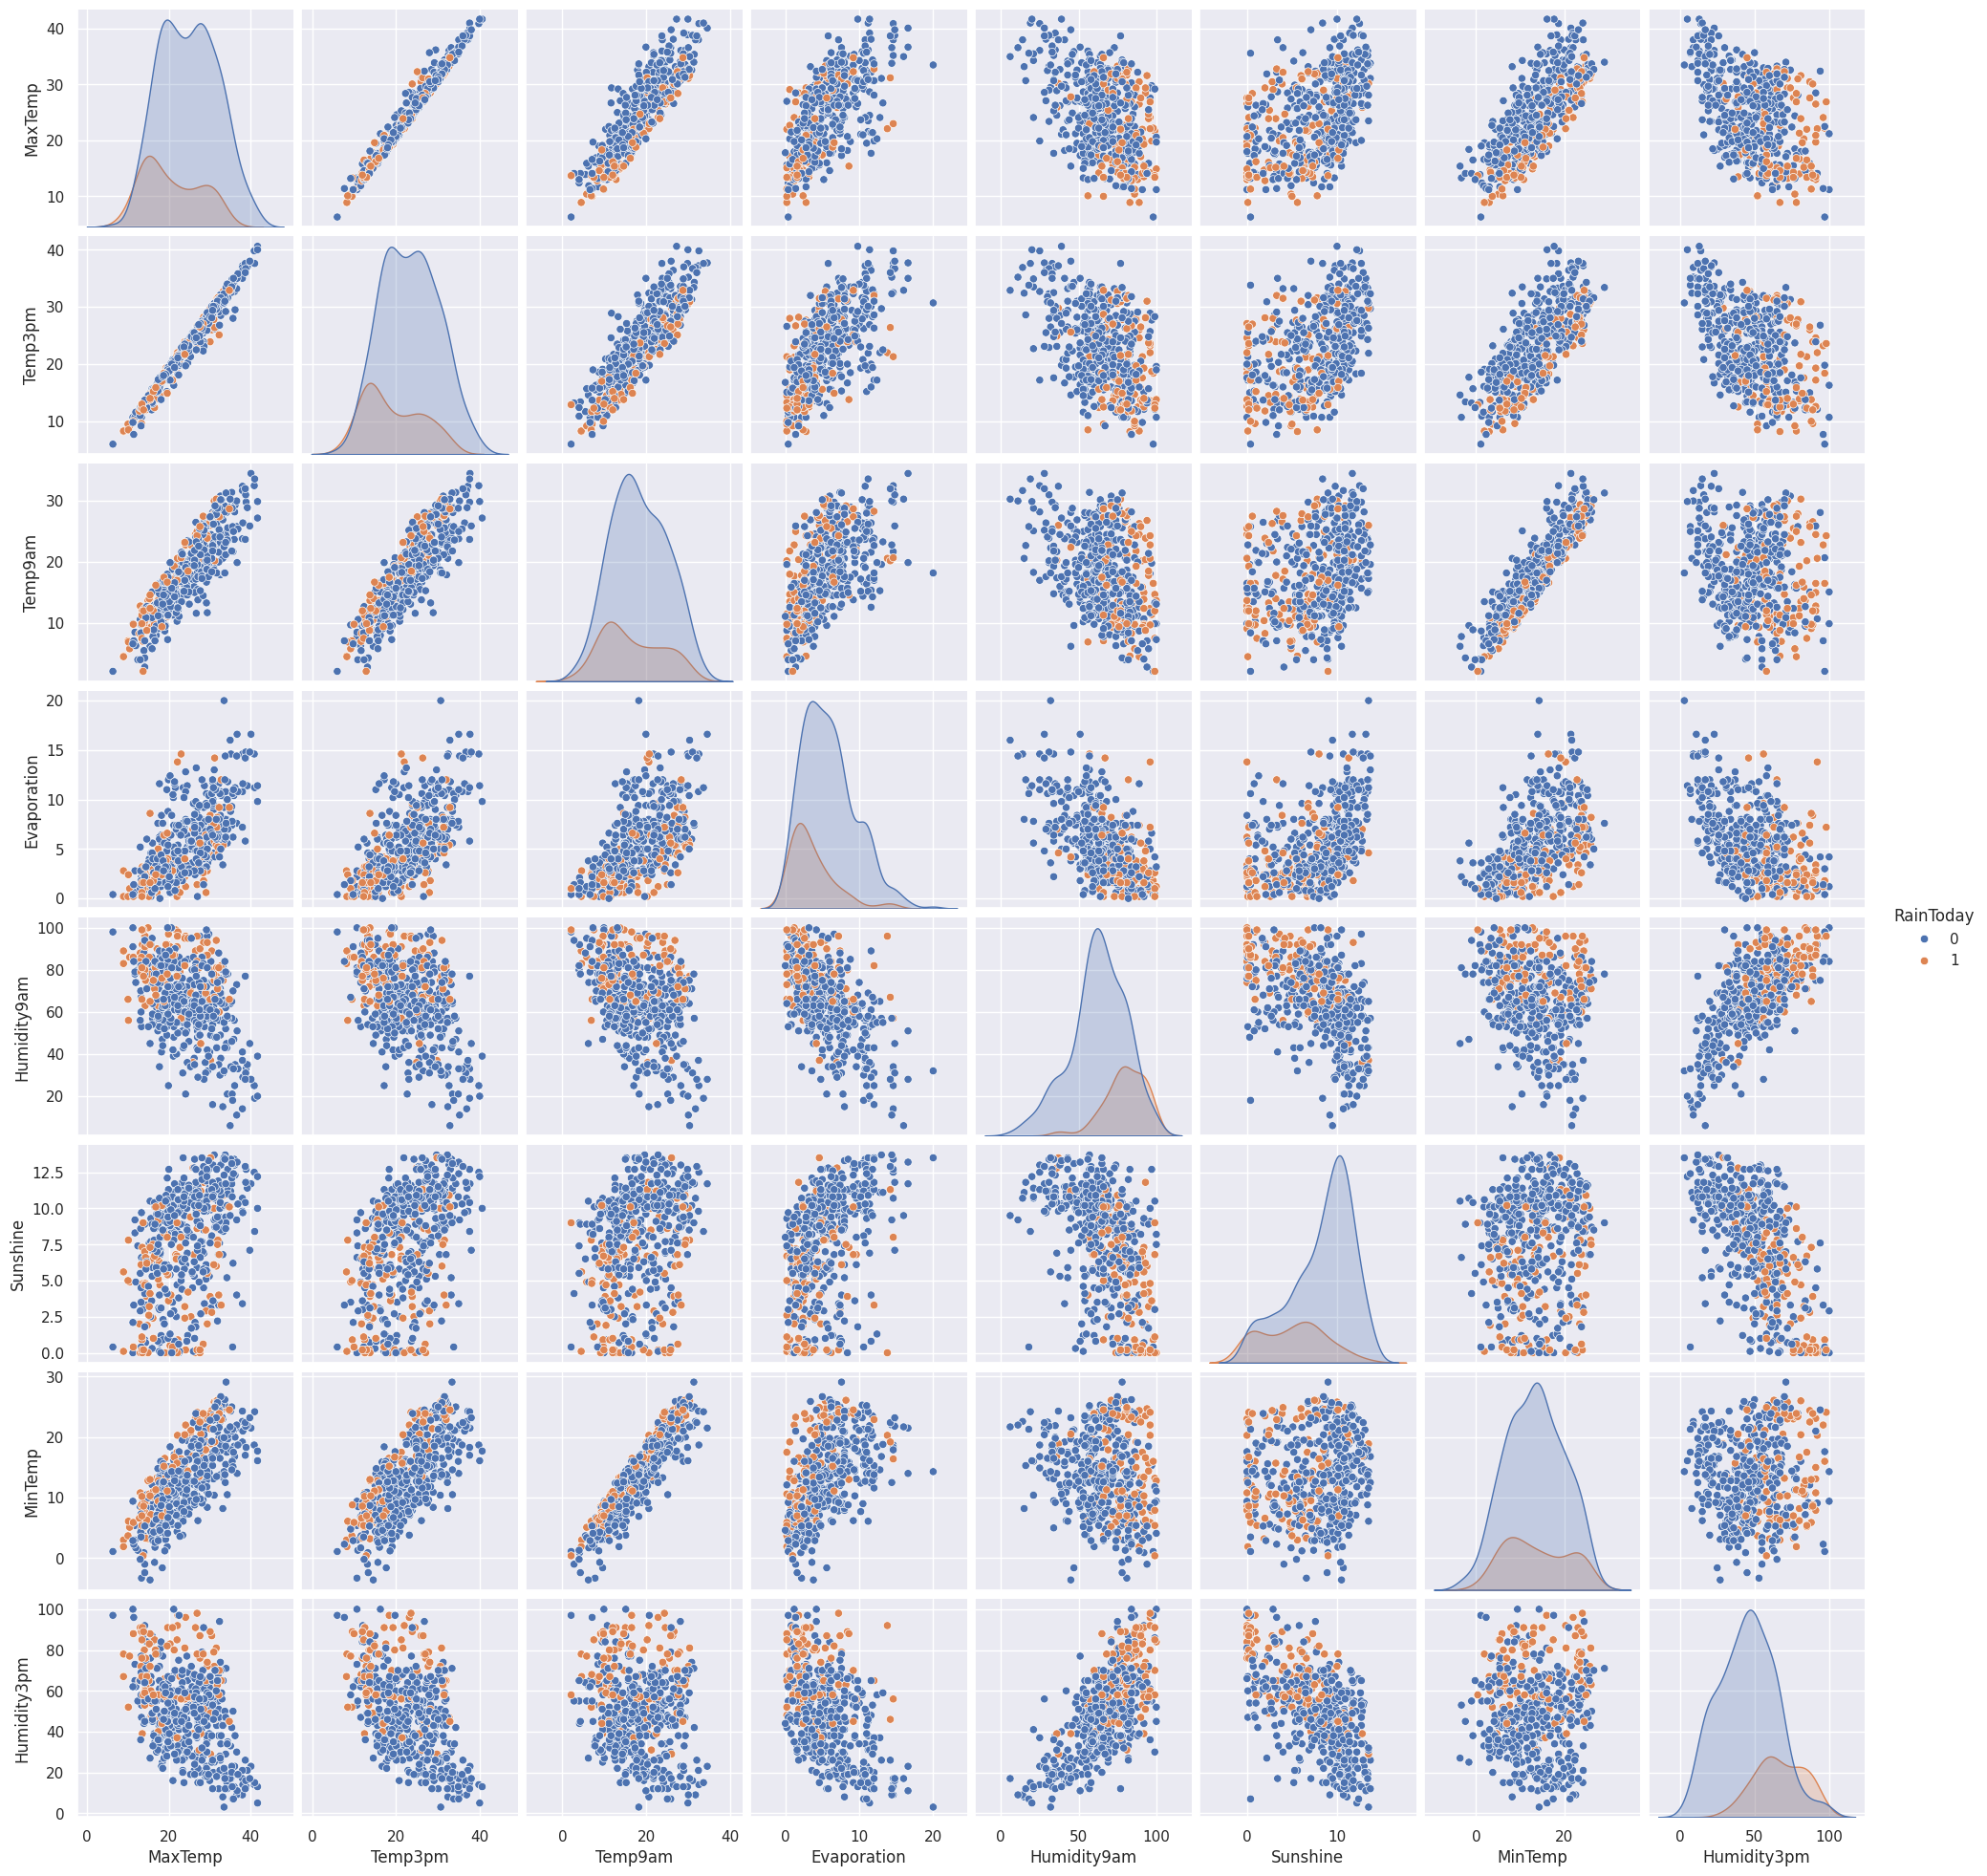

In [ ]:
sns.pairplot(df, hue='RainToday')
plt.show()

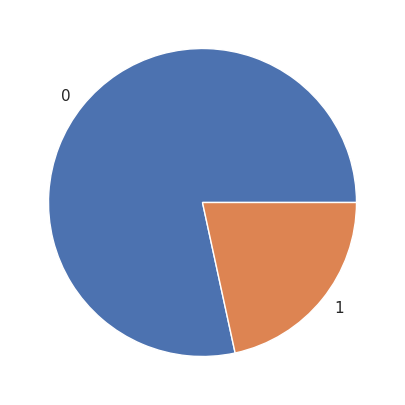

In [ ]:
y =df['RainToday']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Balancing**

After cleaning the dataset, an analysis of the target variable **RainToday** showed an imbalanced class distribution, with a much larger number of samples labeled ‘0’ compared to ‘1’, as illustrated in the plot above.

To correct this imbalance, random undersampling was applied, reducing the majority class so that both classes are represented equally.

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("https://raw.githubusercontent.com/iamkarandeepsingh/Weather-Forecast-Analysis/refs/heads/main/Weather_Data_Sampled_500%20(1).csv")   # change file name if needed

# Check class distribution
counts = df['RainToday'].value_counts()
majority_class = counts.idxmax()
minority_class = counts.idxmin()

# Separate majority and minority classes
df_majority = df[df['RainToday'] == majority_class]
df_minority = df[df['RainToday'] == minority_class]

# Undersample majority class to match minority count
df_majority_undersampled = df_majority.sample(len(df_minority), replace=False, random_state=42)

# Combine into final balanced dataset
df_undersampled = pd.concat([df_majority_undersampled, df_minority]).sample(frac=1, random_state=42)

# Save result
df_undersampled.to_csv("Weather_Data_Undersampled.csv", index=False)

print("Original class counts:")
print(counts)

print("\nNew class counts after undersampling:")
print(df_undersampled['RainToday'].value_counts())

Original class counts:
RainToday
0    392
1    108
Name: count, dtype: int64

New class counts after undersampling:
RainToday
1    108
0    108
Name: count, dtype: int64


In [ ]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/iamkarandeepsingh/Weather-Forecast-Analysis/refs/heads/main/Weather_Data_Undersampled.csv')
df.head(10)

MaxTemp  Temp3pm  Temp9am  Evaporation  Humidity9am  Sunshine  MinTemp  \
0     14.6     13.7      8.8          2.0         93.0       6.2      6.3   
1     34.8     32.9     28.7          9.2         66.0      10.1     24.5   
2     22.2     18.4     16.5          1.8         98.0       0.9     16.0   
3     16.7     13.9     11.2          4.2         81.0       5.9      6.2   
4     36.9     35.8     25.4         10.8         33.0      10.3     18.7   
5      8.9      8.2      4.6          2.8         83.0       5.6      3.0   
6     13.7     12.9      2.1          1.0         99.0       9.0      0.4   
7     18.3     17.1     14.7          5.6         63.0       8.0      8.6   
8     28.4     27.0     27.5          2.6         72.0       0.6     23.9   
9     29.1     28.0     21.8          0.6         87.0       2.9     19.2   

   Humidity3pm  RainToday  
0         67.0          1  
1         45.0          1  
2         97.0          1  
3         80.0          1  
4         19.0          0  
5         67.0          1  
6         58.0          1  
7         38.0          0  
8         78.0          1  
9         65.0          1

**Data Matrix**

In [ ]:
X = df.drop(columns=['RainToday'])
X.head(10)

MaxTemp  Temp3pm  Temp9am  Evaporation  Humidity9am  Sunshine  MinTemp  \
0     14.6     13.7      8.8          2.0         93.0       6.2      6.3   
1     34.8     32.9     28.7          9.2         66.0      10.1     24.5   
2     22.2     18.4     16.5          1.8         98.0       0.9     16.0   
3     16.7     13.9     11.2          4.2         81.0       5.9      6.2   
4     36.9     35.8     25.4         10.8         33.0      10.3     18.7   
5      8.9      8.2      4.6          2.8         83.0       5.6      3.0   
6     13.7     12.9      2.1          1.0         99.0       9.0      0.4   
7     18.3     17.1     14.7          5.6         63.0       8.0      8.6   
8     28.4     27.0     27.5          2.6         72.0       0.6     23.9   
9     29.1     28.0     21.8          0.6         87.0       2.9     19.2   

   Humidity3pm  
0         67.0  
1         45.0  
2         97.0  
3         80.0  
4         19.0  
5         67.0  
6         58.0  
7         38.0  
8         78.0  
9         65.0

In [ ]:
X.describe().transpose()

count       mean        std  min     25%    50%    75%    max
MaxTemp      216.0  22.583796   7.343269  8.9  16.100  21.90  28.50   41.0
Temp3pm      216.0  21.031944   7.186418  8.2  14.500  20.30  26.50   39.8
Temp9am      216.0  17.183796   6.887182  2.1  11.475  16.30  22.80   33.6
Evaporation  216.0   4.717593   3.704901  0.2   1.800   4.00   6.45   20.0
Humidity9am  216.0  70.921296  18.348013  6.0  61.750  74.00  83.25  100.0
Sunshine     216.0   6.468981   3.883455  0.0   3.375   6.70   9.65   13.7
MinTemp      216.0  13.173148   6.846240 -3.6   7.800  13.05  18.70   26.1
Humidity3pm  216.0  56.574074  21.722223  3.0  42.000  58.00  72.00  100.0

**Standardize the Data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

MaxTemp   Temp3pm   Temp9am  Evaporation  Humidity9am  Sunshine   MinTemp  \
0 -1.089752 -1.022620 -1.220132    -0.735217     1.206125 -0.069424 -1.006262   
1  1.667456  1.655292  1.676006     1.212669    -0.268843  0.937169  1.658306   
2 -0.052386 -0.367089 -0.099516    -0.789325     1.479267 -1.437359  0.413865   
3 -0.803112 -0.994725 -0.870849    -0.140029     0.550584 -0.146855 -1.020903   
4  1.954097  2.059769  1.195742     1.645533    -2.071580  0.988789  0.809158   
5 -1.867776 -1.789731 -1.831377    -0.518785     0.659840 -0.224285 -1.489399   
6 -1.212598 -1.134200 -2.195214    -1.005756     1.533895  0.653258 -1.870051   
7 -0.584719 -0.548406 -0.361478     0.238726    -0.432728  0.395157 -0.669531   
8  0.793885  0.832392  1.501364    -0.572893     0.058928 -1.514789  1.570463   
9  0.889432  0.971867  0.671817    -1.113972     0.878354 -0.921157  0.882361   

   Humidity3pm  
0     0.481081  
1    -0.534059  
2     1.865363  
3     1.080936  
4    -1.733771  
5     0.481081  
6     0.065796  
7    -0.857059  
8     0.988651  
9     0.388795

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

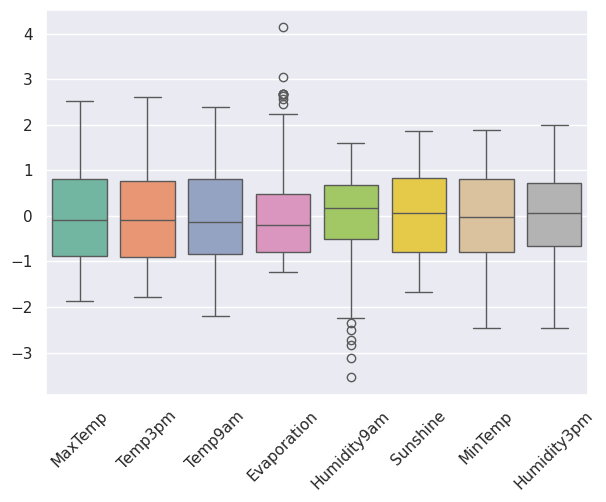

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
# Rotate x-axis tick labels
ax.tick_params(axis='x', labelrotation=45)

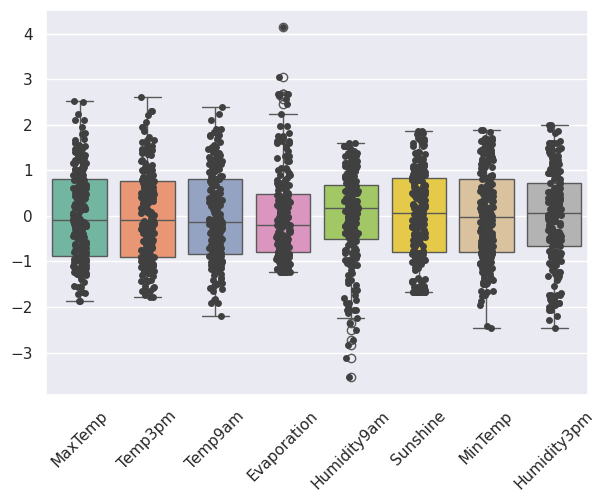

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.tick_params(axis='x', labelrotation=45)

**Correlation Matrix**

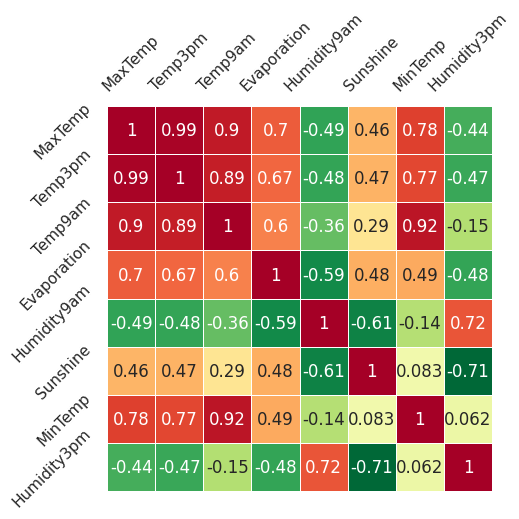

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='y', labelrotation=45)

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Applying PCA**

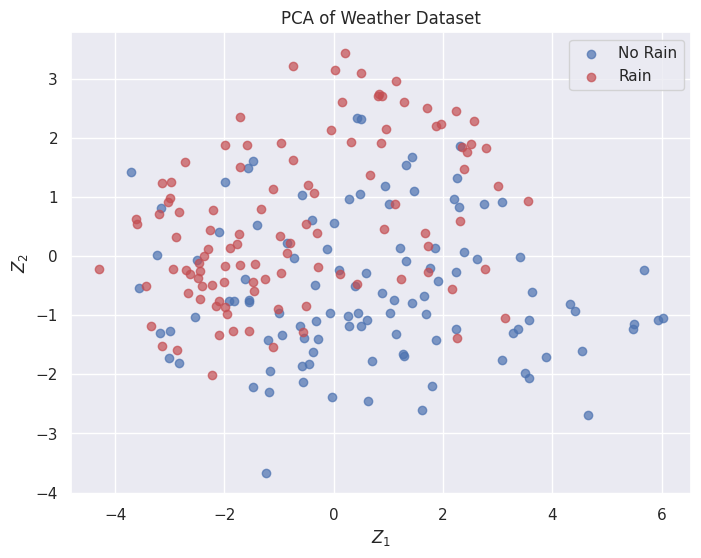

In [ ]:
df = pd.read_csv("Weather_Data_Undersampled.csv")
X = df.drop(columns=['RainToday']).values
y = df['RainToday'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
Z = pca.fit_transform(X_scaled)

idx_NoRain = np.where(y == 0)
idx_Rain = np.where(y == 1)

plt.figure(figsize=(8, 6))
plt.scatter(Z[idx_NoRain, 0], Z[idx_NoRain, 1], c='b', label='No Rain', alpha=0.7)
plt.scatter(Z[idx_Rain, 0], Z[idx_Rain, 1], c='r', label='Rain', alpha=0.7)

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.title('PCA of Weather Dataset')
plt.grid(True)
plt.show()

**Eigenvectors**

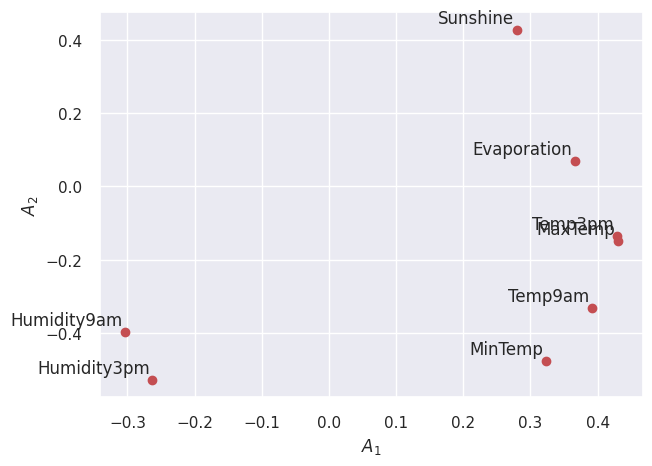

In [ ]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

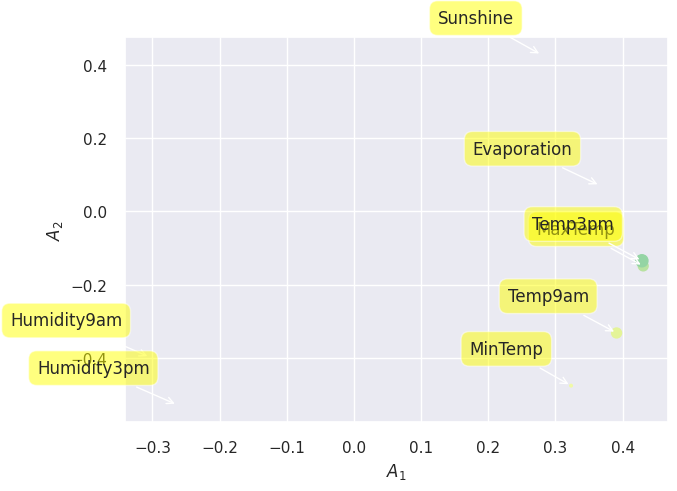

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

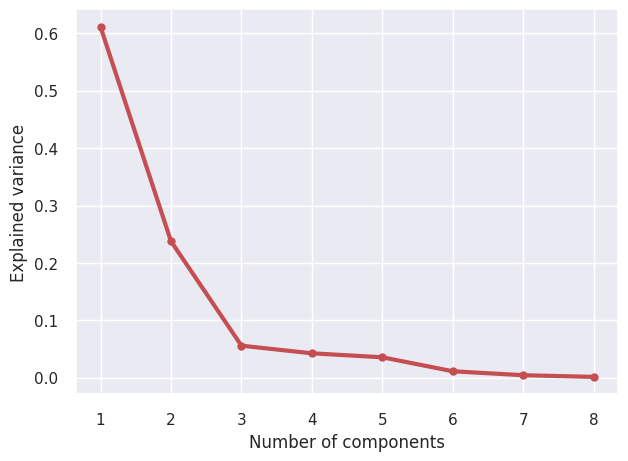

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

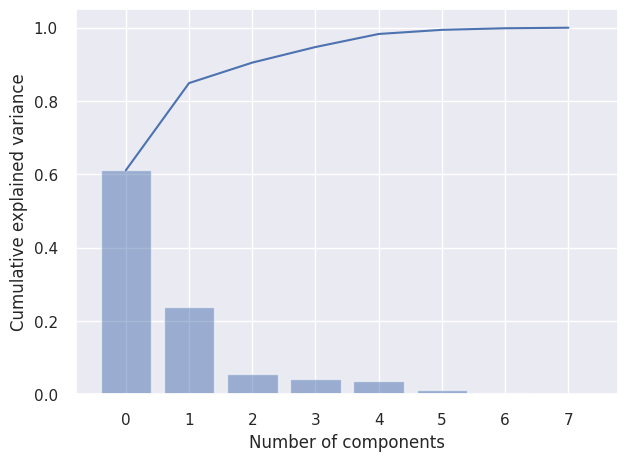

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

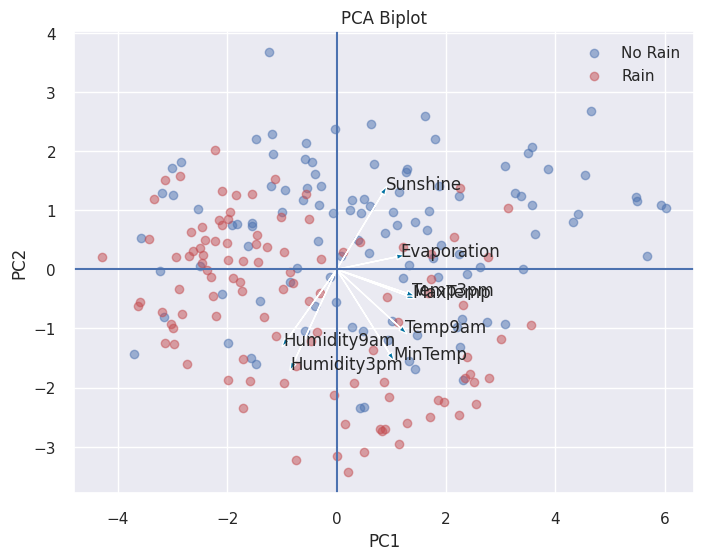

In [ ]:
df = pd.read_csv("Weather_Data_Undersampled.csv")
X = df.drop(columns=["RainToday"]).values
y = df["RainToday"].values
vars = df.drop(columns=["RainToday"]).columns

# PCA
Z = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X))
A = PCA(n_components=2).fit(StandardScaler().fit_transform(X)).components_.T

# Biplot
plt.figure(figsize=(8, 6))
plt.scatter(Z[y==0,0], Z[y==0,1], c='b', alpha=0.5, label='No Rain')
plt.scatter(Z[y==1,0], Z[y==1,1], c='r', alpha=0.5, label='Rain')

for i, v in enumerate(vars):
    plt.arrow(0, 0, A[i,0]*3, A[i,1]*3, head_width=0.1)
    plt.text(A[i,0]*3.2, A[i,1]*3.2, v)

plt.axhline(0); plt.axvline(0)
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.legend()
plt.grid(True)
plt.show()

##**Using PCA Library**

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca(n_components=0.85)
# Fit transform
out = model.fit_transform(X)

[13-12-2025 20:27:26] [pca.pca] [INFO] Column labels are auto-completed.
[13-12-2025 20:27:26] [pca.pca] [INFO] Row labels are auto-completed.
[13-12-2025 20:27:26] [pca.pca] [INFO] PCA reduction performed to capture at least 85.0% explained variance using 8 columns of the input data.
[13-12-2025 20:27:26] [pca.pca] [INFO] Fit using PCA.
[13-12-2025 20:27:26] [pca.pca] [INFO] Compute loadings and PCs.
[13-12-2025 20:27:27] [pca.pca] [INFO] Compute explained variance.
[13-12-2025 20:27:27] [pca.pca] [INFO] The top 2 principal component(s) explains >= 85.00% of the explained variance.
[13-12-2025 20:27:27] [pca.pca] [INFO] The PCA reduction is performed on 8 variables (columns) of the input dataframe.
[13-12-2025 20:27:27] [pca.pca] [INFO] Fit using PCA.
[13-12-2025 20:27:27] [pca.pca] [INFO] Compute loadings and PCs.
[13-12-2025 20:27:27] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[13-12-2025 20:27:27] [pca.pca] [INFO] Multiple test

**Principal Components**

In [ ]:
out['PC']

PC1        PC2
0   -24.719582 -13.792432
1    17.501721  17.221015
2   -47.884725  10.871300
3   -26.496180  -3.714960
4    57.349331  10.807534
..         ...        ...
211  10.072422  -2.628981
212  52.004787  -6.311999
213  44.409628   0.572087
214 -23.763144  16.508670
215  35.739200   0.841143

[216 rows x 2 columns]

**Scatter plot**

[13-12-2025 20:27:31] [pca.pca] [WARNING] Parameter <label> is deprecated and will not be supported in future version.
[13-12-2025 20:27:31] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': 'The top 2 Principal Component(s) explains [88.62%] of the variance.'}, xlabel='PC1 (72.2% expl.var)', ylabel='PC2 (16.3% expl.var)'>)

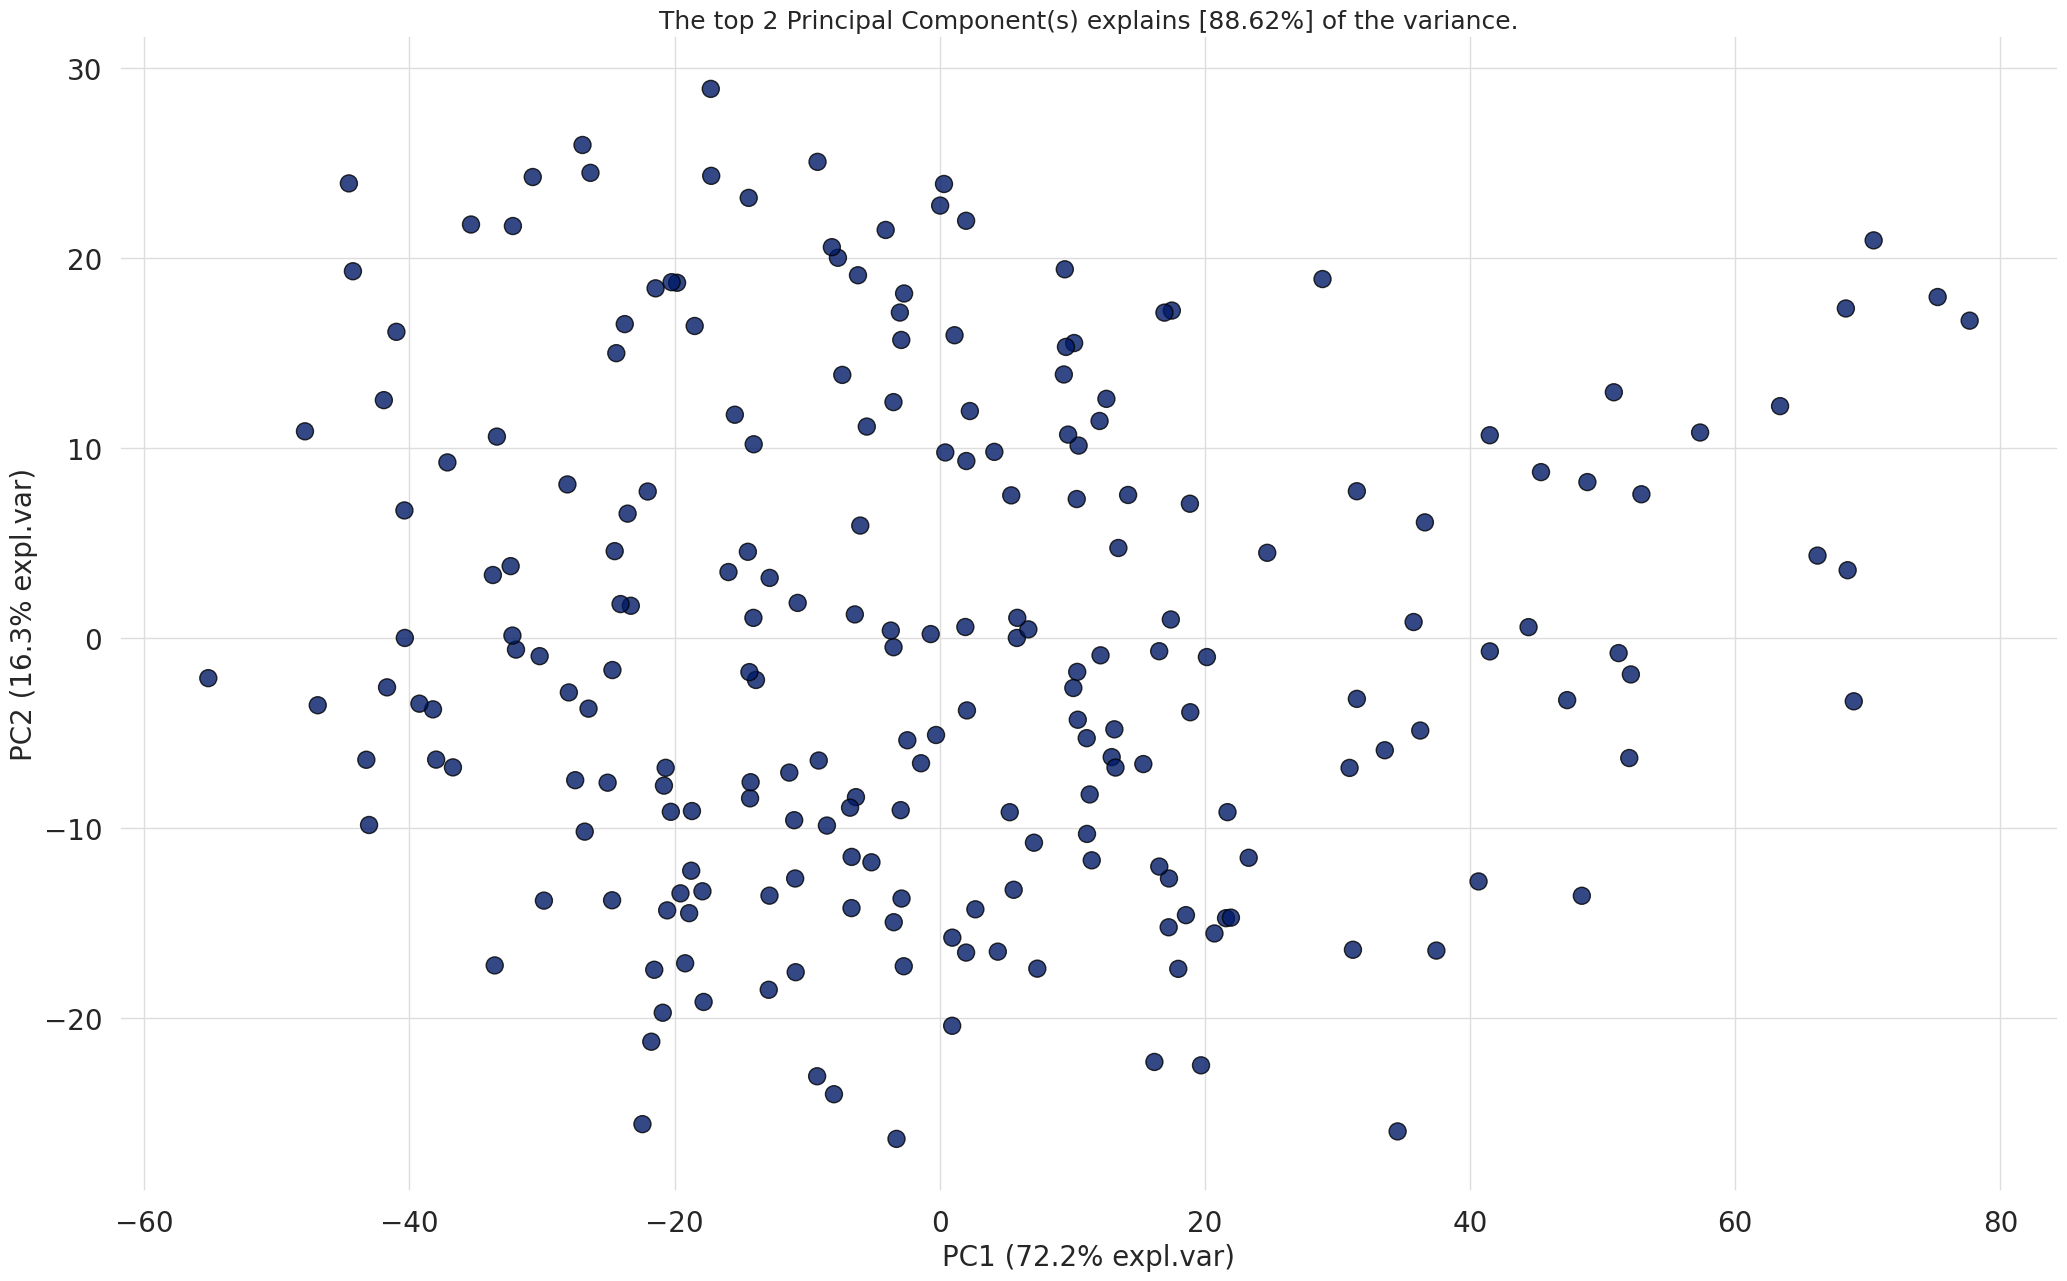

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

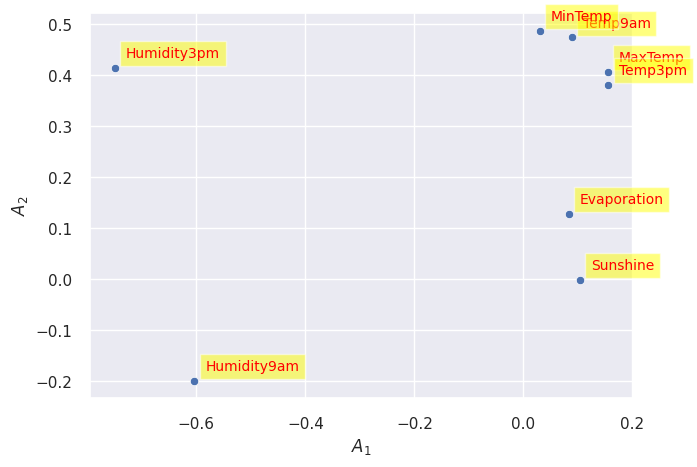

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

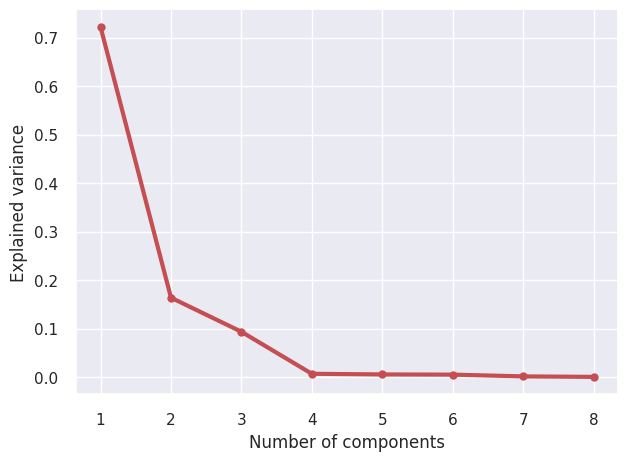

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

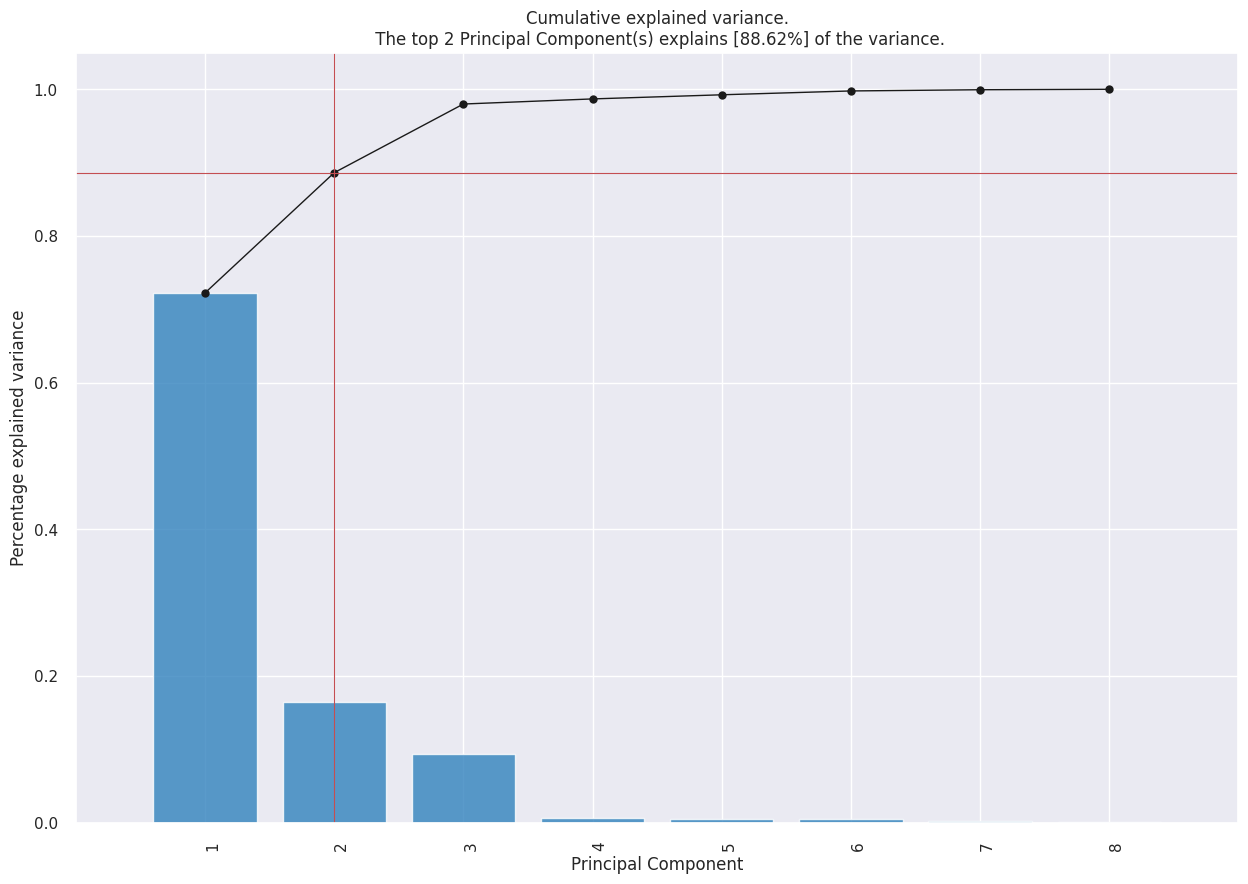

In [ ]:
model.plot();

**Biplot**

A biplot is a graphical representation of multivariate data that displays both observations and variables simultaneously in a single plot. Each observation is represented as a point in a two-dimensional plot, while the variables are represented as arrows or vectors that point in the direction of the greatest variation in the data. The length of the vector indicates the magnitude of the variable, while the angle between two vectors reflects their correlation.

[13-12-2025 20:27:45] [pca.pca] [WARNING] Parameter <label> is deprecated and will not be supported in future version.
[13-12-2025 20:27:45] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[13-12-2025 20:27:45] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': 'The top 2 Principal Component(s) explains [88.62%] of the variance.'}, xlabel='PC1 (72.2% expl.var)', ylabel='PC2 (16.3% expl.var)'>)

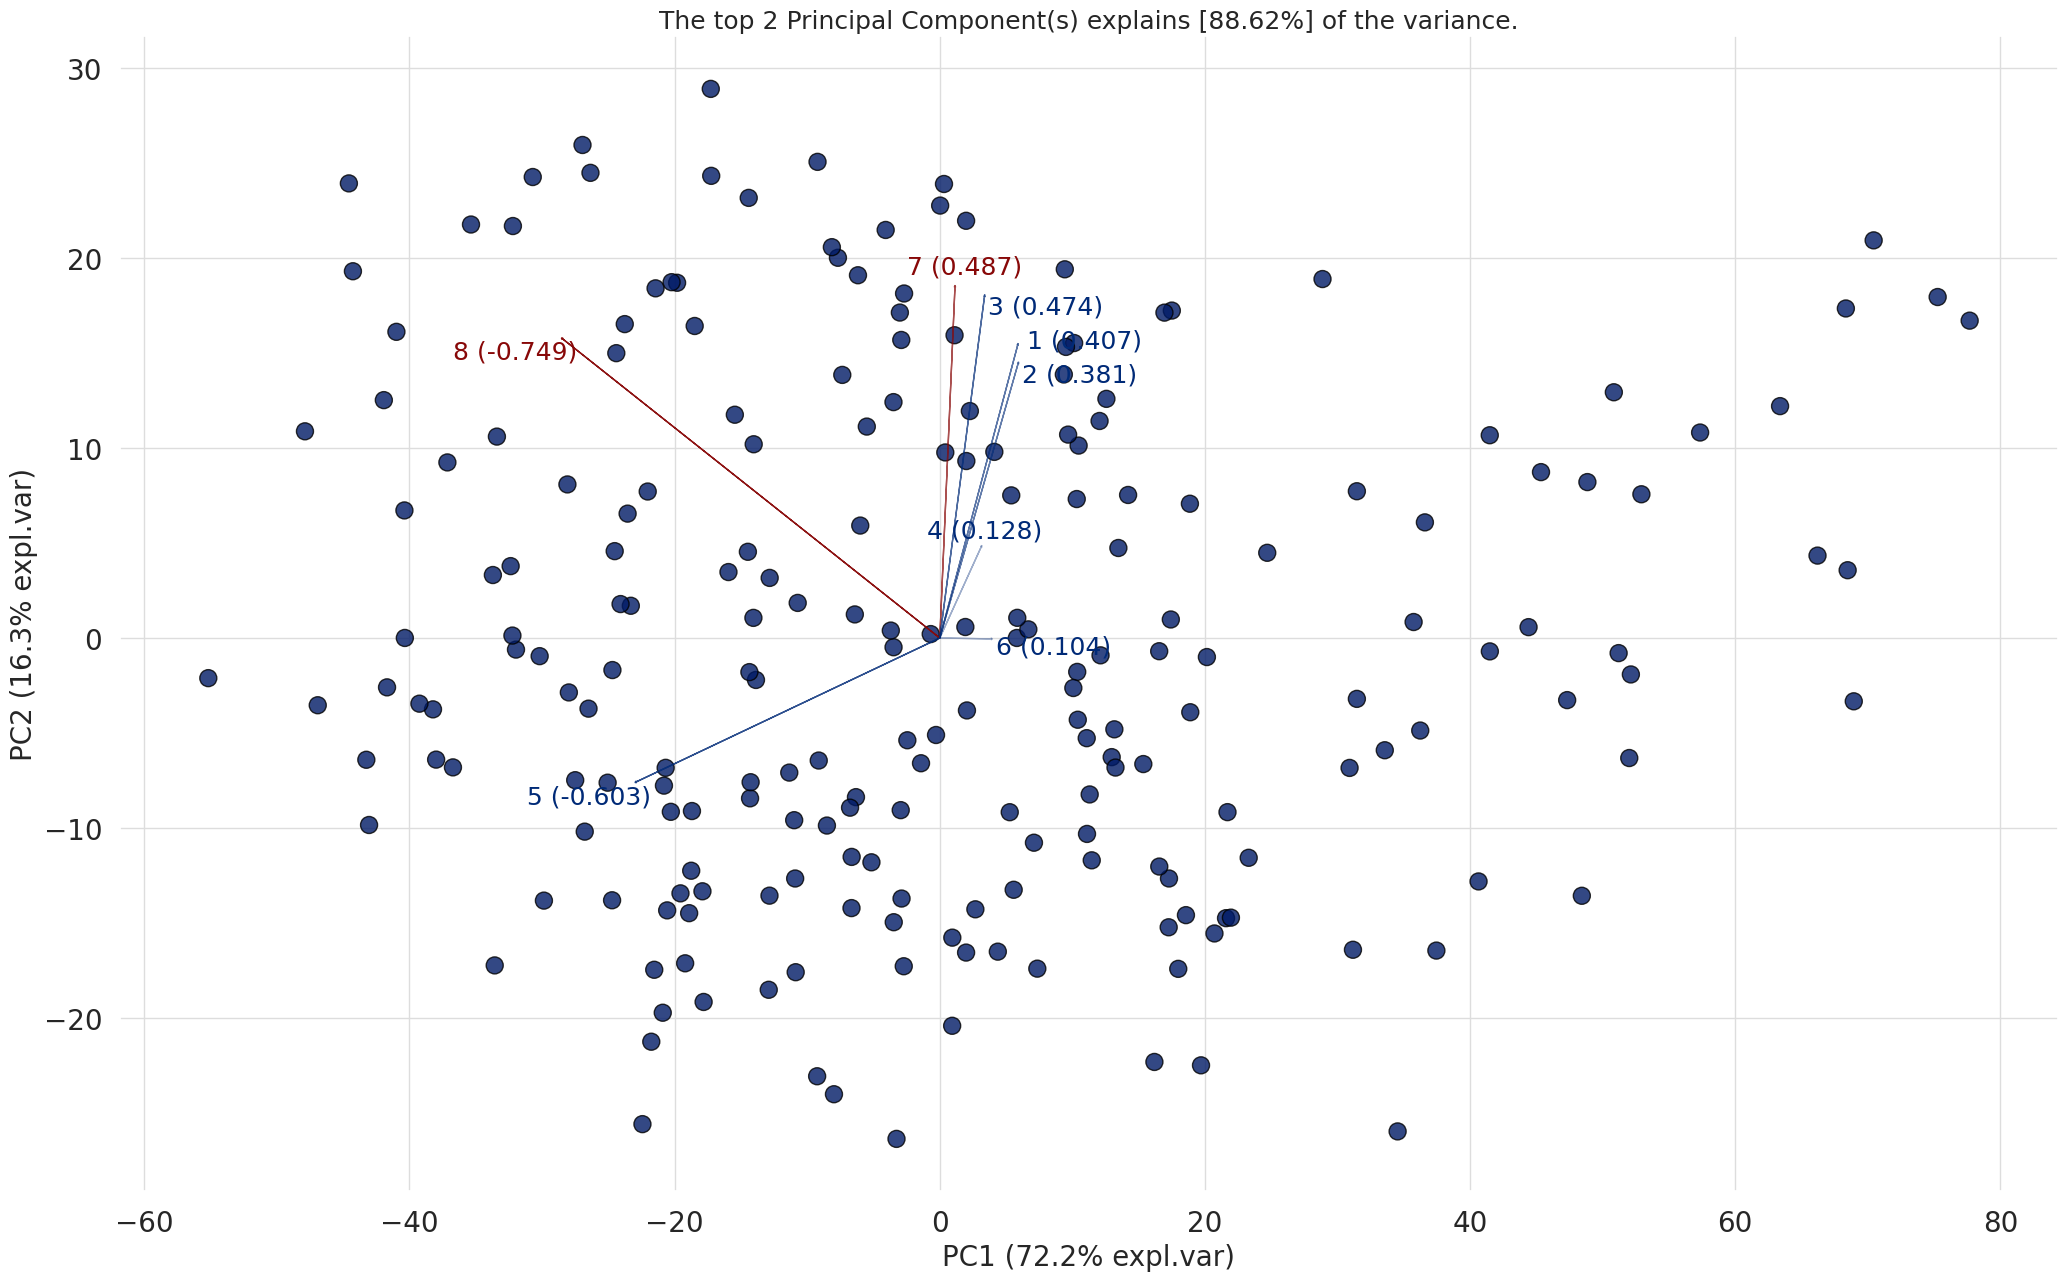

In [ ]:
model.biplot(label=False, legend=False)

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (194, 9)
Unseen Data For Predictions: (22, 9)


## **Install PyCaret**

PyCaret is an open-source, low-code machine learning library in Python designed to make the end-to-end machine learning process easier and faster for both beginners and experienced data scientists. It offers a variety of tools and functions for data preparation, model training, model selection, and deployment.

pip3 install pycaret==2.3.6 is a command used to install a specific version of the PyCaret library in Python. If you encounter an error message, try running the code again.

In [ ]:
# install slim version (default)
!pip install pycaret

**Setting up the Environment in PyCaret**

The **setup()** function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='RainToday', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

**Comparing all Machine Learning Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_samples_leaf=5,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Evaluate Decision Tree Model**

How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [ ]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Logistic Regression Model**

In [ ]:
tuned_lr

LogisticRegression(C=2.833, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=df, target='RainToday', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
best_model_pca

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_best_model_pca

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

In [ ]:
 rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

## **Install Analysis Extras for Explainable AI**

In [ ]:
!pip install pycaret[analysis]

INFO: pip is looking at multiple versions of dash-bootstrap-components to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of interpret-core to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 50.9 MB/s  0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of salib to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of umap-learn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.8/535.8 kB 32.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 111.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

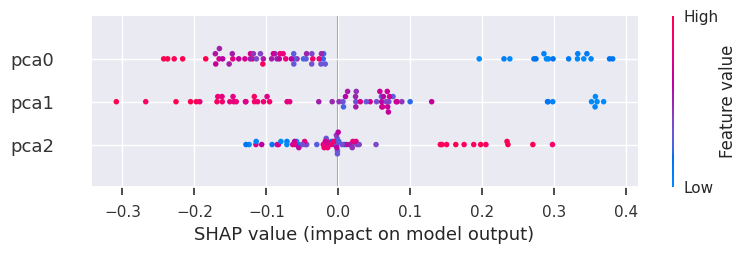

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

From the above the plot, we can see the "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')